# 0. Import Dependencies and Pretrained Model

In [11]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [13]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [14]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [16]:
content_image = load_image('ada-lovelace.jpg')
style_image = load_image('starrynight.jfif')

In [22]:
style_image_monet = load_image('monet.jpeg')

# 2. Visualize Output

In [17]:
content_image.shape

TensorShape([1, 900, 678, 3])

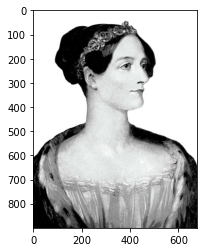

In [28]:
plt.imshow(np.squeeze(content_image))
plt.show()

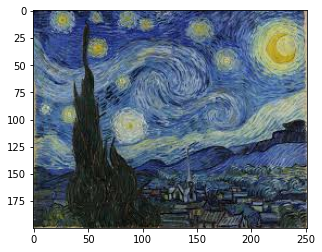

In [18]:
plt.imshow(np.squeeze(style_image))
plt.show()

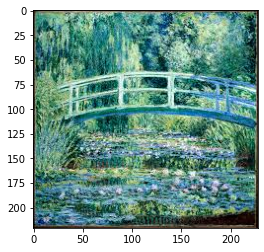

In [23]:
plt.imshow(np.squeeze(style_image_monet))
plt.show()

# 3. Stylize Image

In [19]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

In [24]:
stylized_image_monet = model(tf.constant(content_image), tf.constant(style_image_monet))[0]

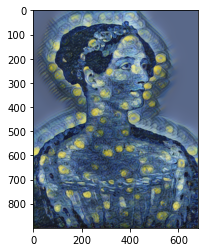

In [20]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

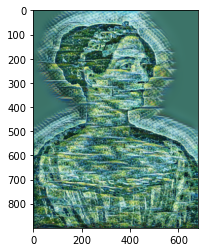

In [25]:
plt.imshow(np.squeeze(stylized_image_monet))
plt.show()

In [21]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True

In [27]:
cv2.imwrite('generated_img_monet.jpg', cv2.cvtColor(np.squeeze(stylized_image_monet)*255, cv2.COLOR_BGR2RGB))

True